# Breast cancer data overview

1. Loading of data

2. Analyzing Data

3. Feature Selection

4. Model Prediction

   a. Logistic Regression
   
   b. Random Forest Classifier
   
   c. Decision Tree Classifier
   
   d. KNeighborsClassifier
   
   
5. Conclusion
                
 

# 1. Loading of Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df=pd.read_csv(r'C:/Users/Mridula/breast_cancer_data.csv')

# 2. Analyzing Data

In [3]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

### Note.  No missing values found

In [5]:
# remove Unnamed: 32 from dataset
df.drop(['Unnamed: 32'], axis=1, inplace=True)

In [6]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [8]:
# We replace a malignant diagnosis with 1, and benign with 0
df['diagnosis'].replace('M',1, inplace=True)
df['diagnosis'].replace('B',0, inplace=True)

Text(0, 0.5, 'Number of Counts')

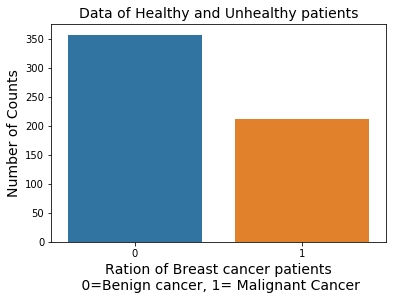

In [9]:
sns.countplot('diagnosis', data=df)
plt.title('Data of Healthy and Unhealthy patients', fontsize=14)
plt.xlabel('Ration of Breast cancer patients\n 0=Benign cancer, 1= Malignant Cancer',fontsize=14)
plt.ylabel('Number of Counts', fontsize=14)

In [10]:
print("Patients with Malignant Cancer are", df['diagnosis'].value_counts()[1])
print("Patients with Benign Cancer are", df['diagnosis'].value_counts()[0])

Patients with Malignant Cancer are 212
Patients with Benign Cancer are 357


#### Note. This is balanced datasheet.

# 3. Feature Selection
Correlation between dependent and independent variables

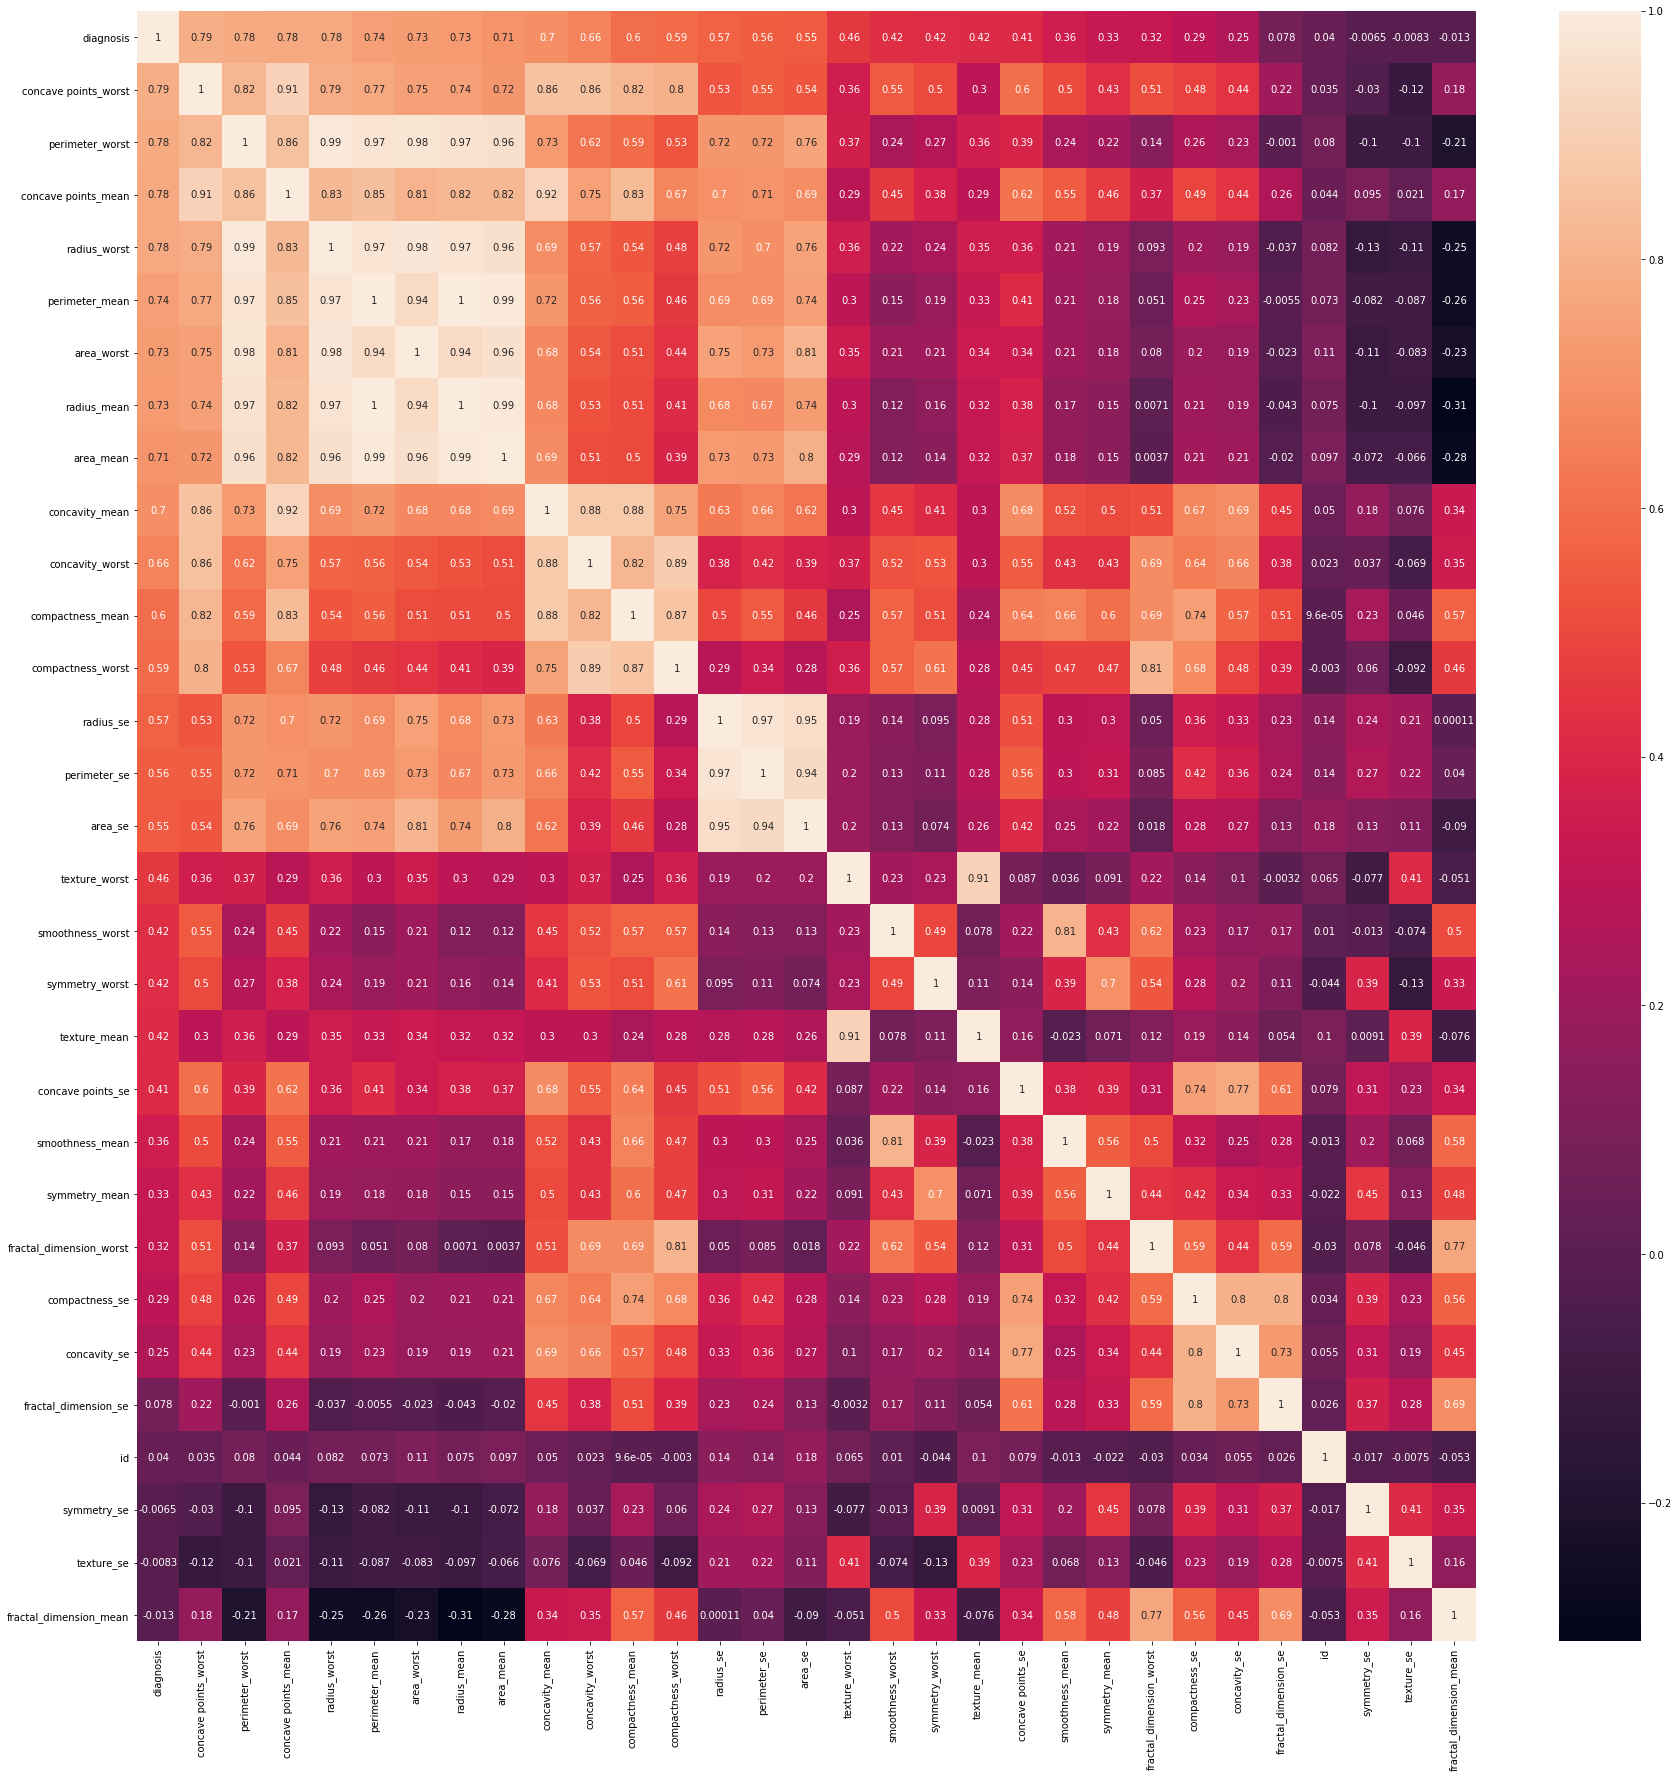

In [11]:
plt.figure(figsize=(30,30))
corr=df.corr()
cols=corr.nlargest(31, 'diagnosis')['diagnosis'].index
cm = np.corrcoef(df[cols].values.T)
sns.heatmap(cm, annot=True, fmt='.2g', xticklabels=cols.values, yticklabels=cols.values)
plt.yticks(rotation=0, size=10)
plt.xticks(rotation=90, size=10)
plt.show()

In [12]:
selected_feature=['concavity_mean', 'concavity_worst', 'compactness_mean','compactness_worst', 'smoothness_worst', 'symmetry_worst', 'concave points_se', 'smoothness_mean', 'symmetry_mean', 'fractal_dimension_worst', 'compactness_se', 'concavity_se', 'fractal_dimension_se', 'symmetry_se', 'texture_se']

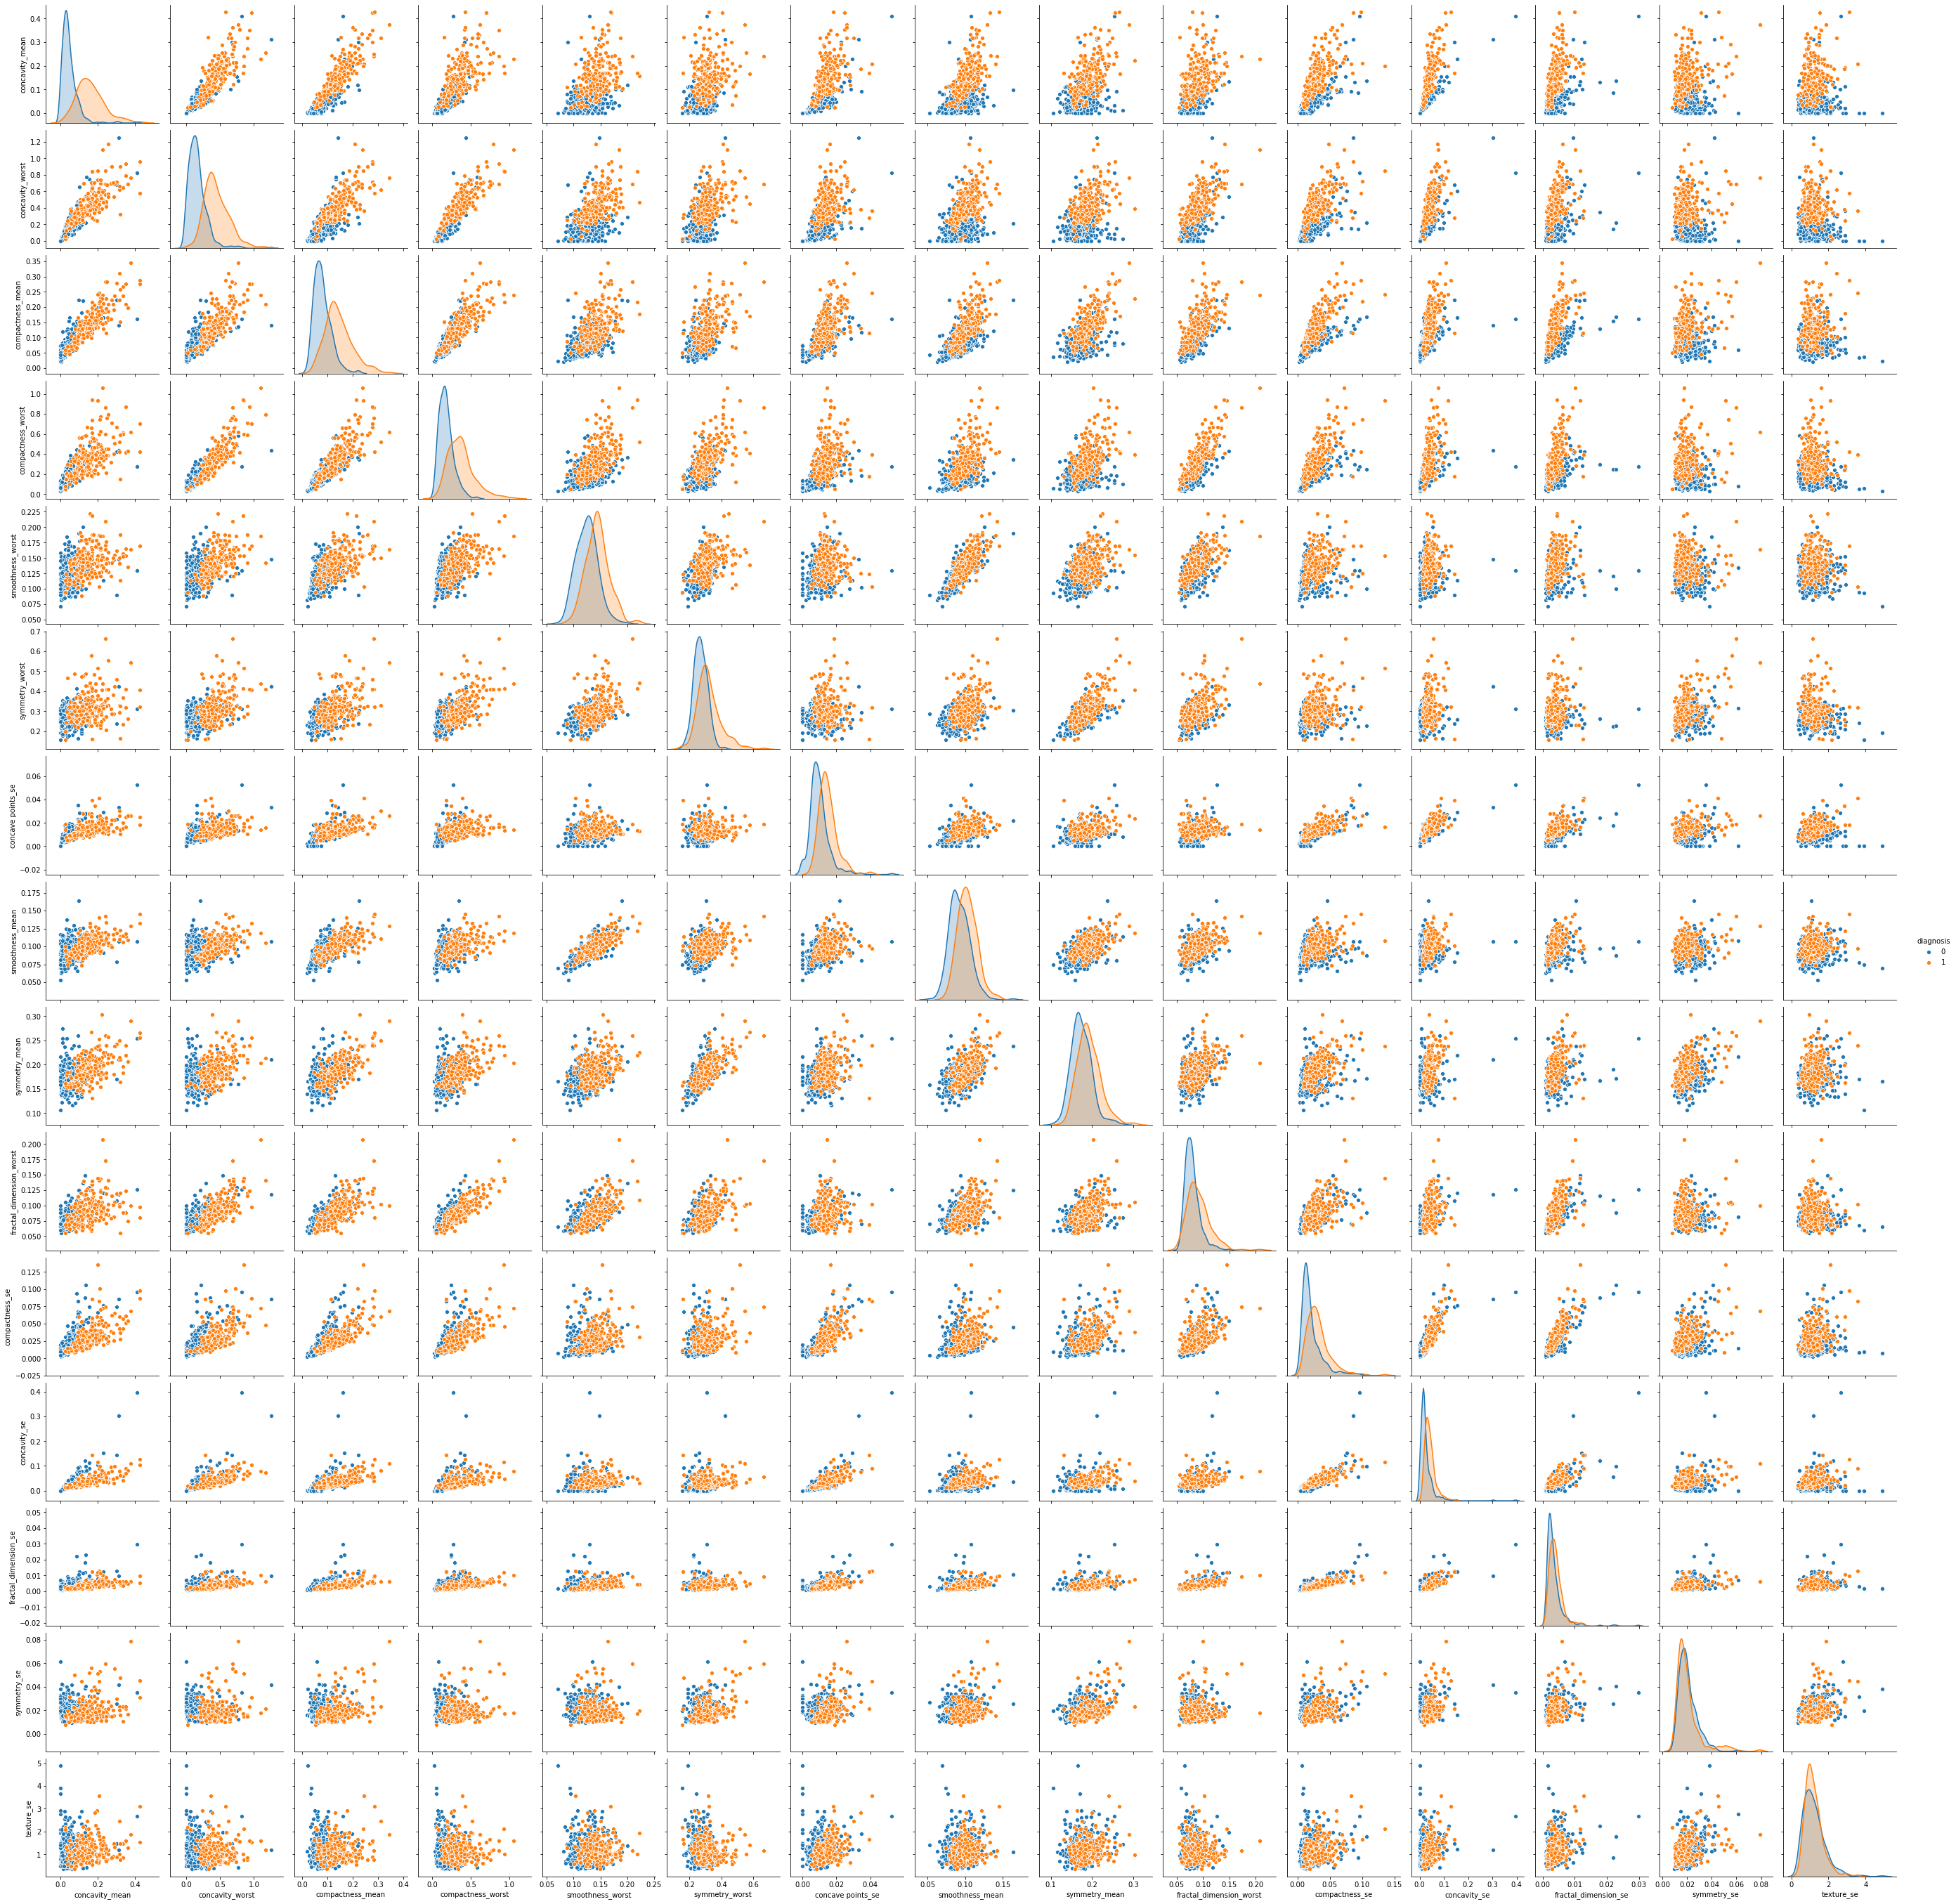

In [13]:
sns.pairplot(data=df, hue='diagnosis', vars=(selected_feature))

# 4. Model Prediction

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop('diagnosis', axis=1)
y=df['diagnosis']

In [16]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 31) (114, 31) (455,) (114,)


## a. Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [18]:
log_reg=LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_score=cross_val_score(log_reg, X_train, y_train, cv=5)
print(log_reg_score)
log_reg_predict=log_reg.predict(X_test)

[0.64835165 0.64835165 0.63736264 0.63736264 0.63736264]


In [19]:
print("Logistic Regression has training score:", round(log_reg_score.mean(), 2)*100, '% of accuracy score')
print('Logistic Regression has test accuracy of', log_reg.score(X_test, y_test)*100, '% of accuracy')

Logistic Regression has training score: 64.0 % of accuracy score
Logistic Regression has test accuracy of 57.01754385964912 % of accuracy


## b. Random Forest Classifier

In [20]:
from sklearn.ensemble import RandomForestClassifier

In [21]:
random_forest=RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_score=cross_val_score(random_forest, X_train, y_train, cv=5)
print(random_forest_score)
rf_predict=random_forest.predict(X_test)

[0.92307692 0.97802198 0.93406593 0.94505495 0.96703297]


In [22]:
print("Random Forest Classifer has training score:", round(random_forest_score.mean(), 2)*100, '% of accuracy score')
print('Random Forest has test accuracy of', random_forest.score(X_test, y_test)*100, '% of accuracy')

Random Forest Classifer has training score: 95.0 % of accuracy score
Random Forest has test accuracy of 95.6140350877193 % of accuracy


## c. Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
decision_tree=DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_score=cross_val_score(decision_tree, X_train, y_train, cv=4)
print(decision_tree_score)
dec_prediction=decision_tree.predict(X_test)

[0.97368421 0.93859649 0.92105263 0.92035398]


In [25]:
print("Decision Tree Classifier has training score ", round(decision_tree_score.mean(),2)*100, '% of accuracy score')
print('Decsion Tree Classifer has test accuracy of ', decision_tree.score(X_test, y_test)*100, '% of accuracy')

Decision Tree Classifier has training score  94.0 % of accuracy score
Decsion Tree Classifer has test accuracy of  97.36842105263158 % of accuracy


## d. KNeighborsClassifier

from sklearn.neighbors import KNeighborsClassifier

In [26]:
k_near=DecisionTreeClassifier()
k_near.fit(X_train, y_train)
k_near_score=cross_val_score(k_near, X_train, y_train, cv=5)
print(k_near_score)
prediction=k_near.predict(X_test)

[0.92307692 0.94505495 0.9010989  0.92307692 0.94505495]


In [27]:
print("KNeighborsClassifier has training score ", round(k_near_score.mean(),2)*100, '% of accuracy score')
print("KNeighborsClassifier has a score test score ", (k_near.score(X_test, y_test))*100, '% of accuracy')

KNeighborsClassifier has training score  93.0 % of accuracy score
KNeighborsClassifier has a score test score  94.73684210526315 % of accuracy


# 5.Conclusion

According to above algorithm Random Forest Classifier is working fine in this case with training score:95%, Test score: 96%.

If there is any mistake please let me know. Thank you!
